In [14]:
from pymc3 import Model, Normal, invlogit, Binomial, sample, forestplot, traceplot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data
n = np.ones(4)*5
y = np.array([0, 1, 3, 5])
dose = np.array([-.86,-.3,-.05,.73])

with Model() as bioassay_model:

    # Prior distributions for latent variables
    alpha = Normal('alpha', 0, sd=100)
    beta = Normal('beta', 0, sd=100)

    # Linear combinations of parameters
    theta = invlogit(alpha + beta*dose)

    # Model likelihood
    deaths = Binomial('deaths', n=n, p=theta, observed=y)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 2975.34draws/s]
/Users/hstrey/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 25% for some parameters.


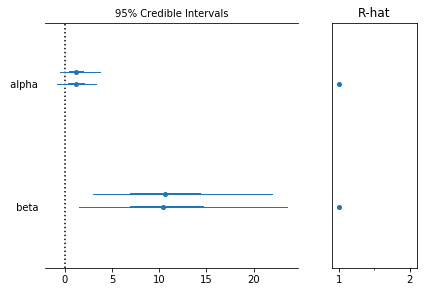

In [3]:
with bioassay_model:

    # Draw wamples
    trace = sample(1000, njobs=2)
    # Plot two parameters
    forestplot(trace, varnames=['alpha', 'beta'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25f1c630>,
      dtype=object)

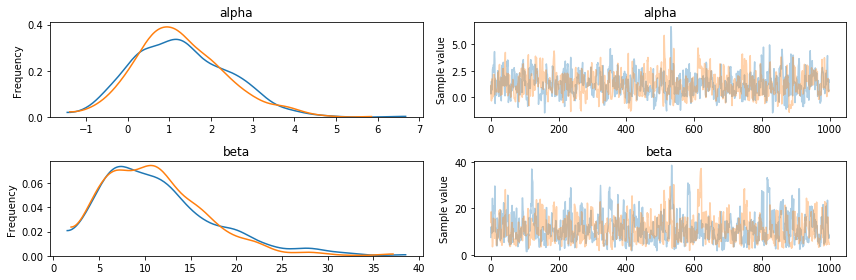

In [15]:
traceplot(trace)

In [13]:
a = trace['alpha']
b = trace['beta']
print(a.shape)

(2000,)


In [7]:
ld50 = -a/b

(array([0.01442397, 0.01442397, 0.        , 0.01442397, 0.05769588,
        0.05769588, 0.2452075 , 0.72119853, 1.06737383, 2.72613045,
        4.03871177, 5.07723766, 4.8608781 , 4.00986383, 2.42322706,
        1.09622177, 0.85101427, 0.63465471, 0.2452075 , 0.28847941,
        0.10096779, 0.15866368, 0.02884794, 0.02884794, 0.02884794,
        0.01442397, 0.01442397, 0.        , 0.        , 0.02884794]),
 array([-0.52860214, -0.49393762, -0.4592731 , -0.42460858, -0.38994407,
        -0.35527955, -0.32061503, -0.28595051, -0.25128599, -0.21662147,
        -0.18195695, -0.14729243, -0.11262792, -0.0779634 , -0.04329888,
        -0.00863436,  0.02603016,  0.06069468,  0.0953592 ,  0.13002372,
         0.16468823,  0.19935275,  0.23401727,  0.26868179,  0.30334631,
         0.33801083,  0.37267535,  0.40733987,  0.44200438,  0.4766689 ,
         0.51133342]),
 <a list of 30 Patch objects>)

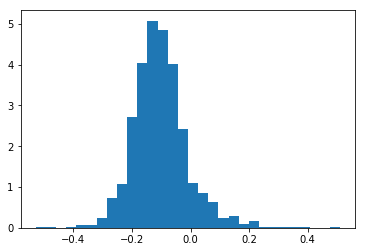

In [10]:
plt.hist(ld50, bins=30,density=True)

In [12]:
print(np.percentile(ld50,[2.5,25,50,75,97.5]))

[-0.26748201 -0.16067602 -0.11055077 -0.05417988  0.12405301]
